### Importing the mastertable (*After performing joins on SQL)

In [1]:
import pandas as pd
import numpy as np
mastertable_df=pd.read_csv('result_final.csv',sep=',',header=0)
mastertable_df.head(5)

,SALES_ID,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,CITY_CODE,STATE_CODE,POSTAL_CODE,FUEL,SELLER_TYPE,...,MILEAGE,ENGINE,MAX_POWER,SEATS,MILEAGE_UNIT,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,23.4 kmpl,1248 CC,74 bhp,5,kmpl,23.40,Maharashtra,Mumbai,Y,West
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,21.14 kmpl,1498 CC,103.52 bhp,5,kmpl,21.14,Jharkhand,Ranchi,Y,East
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,17.7 kmpl,1497 CC,78 bhp,5,kmpl,17.70,Uttar Pradesh,Noida,Y,Central
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,23.0 kmpl,1396 CC,90 bhp,5,kmpl,23.00,Uttarakhand,Dehradun,Y,Central
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,16.1 kmpl,1298 CC,88.2 bhp,5,kmpl,16.10,Tamil Nadu,Chennai,Y,South


### Performing EDA

In [2]:
# Checking for Null values (if any) in the mastertable.
mastertable_df.isnull().sum()

SALES_ID         0
NAME             0
YEAR             0
SELLING_PRICE    0
KM_DRIVEN        0
CITY_CODE        0
STATE_CODE       0
POSTAL_CODE      0
FUEL             0
SELLER_TYPE      0
TRANSMISSION     0
OWNER            0
MILEAGE          0
ENGINE           0
MAX_POWER        0
SEATS            0
MILEAGE_UNIT     0
MILEAGE_NO       0
STATE_NAME       0
CITY_NAME        0
SOLD             0
REGION           0
dtype: int64

In [3]:
# Checking for duplicated values

duplicate = mastertable_df[mastertable_df.duplicated()]
duplicate

,SALES_ID,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,CITY_CODE,STATE_CODE,POSTAL_CODE,FUEL,SELLER_TYPE,...,MILEAGE,ENGINE,MAX_POWER,SEATS,MILEAGE_UNIT,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION


In [4]:
# Checking the Dimensions of our mastertable
print (mastertable_df.shape)

(7906, 22)


In [5]:
# Checking the datatypes of each column in the mastertable
print (mastertable_df.dtypes)

SALES_ID           int64
NAME              object
YEAR               int64
SELLING_PRICE      int64
KM_DRIVEN          int64
CITY_CODE         object
STATE_CODE        object
POSTAL_CODE        int64
FUEL              object
SELLER_TYPE       object
TRANSMISSION      object
OWNER             object
MILEAGE           object
ENGINE            object
MAX_POWER         object
SEATS              int64
MILEAGE_UNIT      object
MILEAGE_NO       float64
STATE_NAME        object
CITY_NAME         object
SOLD              object
REGION            object
dtype: object


In [6]:
print (mastertable_df['SOLD'])

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
7901    N
7902    N
7903    N
7904    N
7905    N
Name: SOLD, Length: 7906, dtype: object


In [7]:
# Adding two extra columns 'BRAND' & 'MODEL'
mastertable_df['BRAND']=mastertable_df["NAME"].str.split(" ",1,expand=True)[0]
mastertable_df['MODEL']=mastertable_df["NAME"].str.split(" ",1,expand=True)[1]
mastertable_df.head()

,SALES_ID,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,CITY_CODE,STATE_CODE,POSTAL_CODE,FUEL,SELLER_TYPE,...,MAX_POWER,SEATS,MILEAGE_UNIT,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION,BRAND,MODEL
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,74 bhp,5,kmpl,23.40,Maharashtra,Mumbai,Y,West,Maruti,Swift Dzire VDI
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,103.52 bhp,5,kmpl,21.14,Jharkhand,Ranchi,Y,East,Skoda,Rapid 1.5 TDI Ambition
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,78 bhp,5,kmpl,17.70,Uttar Pradesh,Noida,Y,Central,Honda,City 2017-2020 EXi
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,90 bhp,5,kmpl,23.00,Uttarakhand,Dehradun,Y,Central,Hyundai,i20 Sportz Diesel
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,88.2 bhp,5,kmpl,16.10,Tamil Nadu,Chennai,Y,South,Maruti,Swift VXI BSIII


In [2]:
#Creating two dataframes based on whether the use car is sold or not!

sold_df = mastertable_df.query("SOLD == 'Y' ")
print("No. of actually sold cars = ", sold_df['SOLD'].count())
unsold_df = mastertable_df.query("SOLD == 'N' ")
print("No. of cars which is not sold =", unsold_df['SOLD'].count())

No. of actually sold cars =  2000
No. of cars which is not sold = 5906


In [9]:
sold_df.head(3)

,SALES_ID,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,CITY_CODE,STATE_CODE,POSTAL_CODE,FUEL,SELLER_TYPE,...,MAX_POWER,SEATS,MILEAGE_UNIT,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION,BRAND,MODEL
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,74 bhp,5,kmpl,23.40,Maharashtra,Mumbai,Y,West,Maruti,Swift Dzire VDI
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,103.52 bhp,5,kmpl,21.14,Jharkhand,Ranchi,Y,East,Skoda,Rapid 1.5 TDI Ambition
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,78 bhp,5,kmpl,17.70,Uttar Pradesh,Noida,Y,Central,Honda,City 2017-2020 EXi


In [10]:
unsold_df.head(3)

,SALES_ID,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,CITY_CODE,STATE_CODE,POSTAL_CODE,FUEL,SELLER_TYPE,...,MAX_POWER,SEATS,MILEAGE_UNIT,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION,BRAND,MODEL
2000,2062,Hyundai i20 Sportz 1.4 CRDi,2014,450000,56000,CT29,ST24,632001,Diesel,Individual,...,88.76 bhp,5,kmpl,21.90,Tamil Nadu,Vellore,N,South,Hyundai,i20 Sportz 1.4 CRDi
2001,2063,BMW 3 Series 320d Luxury Line,2012,1300000,140000,CT10,ST12,560037,Diesel,Individual,...,184 bhp,5,kmpl,18.88,Karnataka,Bangalore,N,South,BMW,3 Series 320d Luxury Line
2002,2064,Maruti Celerio VXI,2016,351000,60000,CT23,ST12,574142,Petrol,Individual,...,67.04 bhp,5,kmpl,23.10,Karnataka,Mangalore,N,South,Maruti,Celerio VXI


#  Analysis of sales Based on:

### BRAND & MODELS :

#### SOLD CARS DETAILS:

In [11]:
print ("No.of sold cars based on the BRANDS :\n")
print (sold_df.groupby("BRAND").agg({"BRAND":'count'}))

No.of sold cars based on the BRANDS :

               BRAND
BRAND               
Audi               9
BMW               29
Chevrolet         56
Daewoo             1
Datsun            16
Fiat               6
Force              1
Ford              92
Honda            124
Hyundai          332
Jaguar            21
Jeep               9
Kia                2
Land               1
Lexus             11
MG                 2
Mahindra         201
Maruti           597
Mercedes-Benz     16
Mitsubishi         3
Nissan            33
Renault           56
Skoda             20
Tata             178
Toyota           126
Volkswagen        39
Volvo             19


In [12]:
#Creating a Dictionary for the no.of sold cars with the Brands.

soldbrands_arr=(sold_df["BRAND"]).to_numpy()
dic_soldbrands={}
i=0
x=[]
while (i < (len (soldbrands_arr))):
       x.append (soldbrands_arr[i])
       i=i+1 

unique1_brands=np.unique(x)

for brand in unique1_brands:
    dic_soldbrands[brand] = x.count(brand)

print (dic_soldbrands)


{'Audi': 9, 'BMW': 29, 'Chevrolet': 56, 'Daewoo': 1, 'Datsun': 16, 'Fiat': 6, 'Force': 1, 'Ford': 92, 'Honda': 124, 'Hyundai': 332, 'Jaguar': 21, 'Jeep': 9, 'Kia': 2, 'Land': 1, 'Lexus': 11, 'MG': 2, 'Mahindra': 201, 'Maruti': 597, 'Mercedes-Benz': 16, 'Mitsubishi': 3, 'Nissan': 33, 'Renault': 56, 'Skoda': 20, 'Tata': 178, 'Toyota': 126, 'Volkswagen': 39, 'Volvo': 19}


#### Visualization of how Brand value is affecting the sales of used cars

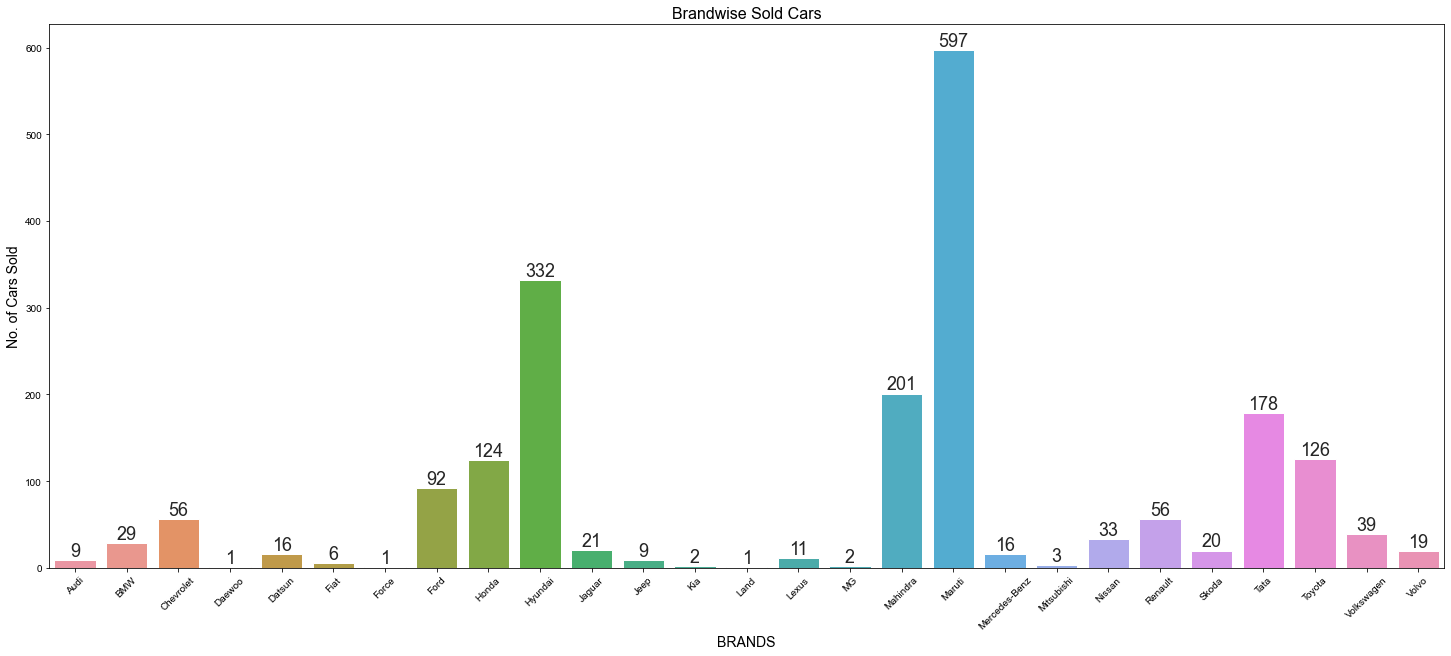

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
keys = list(dic_soldbrands.keys())
vals = list(dic_soldbrands.values())
fig, ax = plt.subplots(figsize=(25, 10))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(x=keys, y=vals, data=sold_df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.set(font_scale=1.5)



plt.title('Brandwise Sold Cars', size=16)
plt.xlabel('BRANDS', size=14)
plt.ylabel('No. of Cars Sold', size=14)
for i in ax.containers:
    ax.bar_label(i,)

#### UNSOLD CARS DETAILS :


In [14]:
print ("No.of unsold cars based on the BRANDS :\n")
print (unsold_df.groupby("BRAND").agg({"BRAND":'count'}))

No.of unsold cars based on the BRANDS :

               BRAND
BRAND               
Ambassador         4
Ashok              1
Audi              31
BMW               89
Chevrolet        174
Daewoo             2
Datsun            49
Fiat              35
Force              5
Ford             296
Honda            342
Hyundai         1028
Isuzu              5
Jaguar            50
Jeep              22
Kia                2
Land               5
Lexus             23
MG                 1
Mahindra         557
Maruti          1770
Mercedes-Benz     38
Mitsubishi        11
Nissan            48
Opel               1
Renault          172
Skoda             84
Tata             541
Toyota           326
Volkswagen       146
Volvo             48


In [15]:
#Creating dictionary for the unsold cars

unsoldbrands_arr=(unsold_df["BRAND"]).to_numpy()
dic_unsoldbrands={}
j=0
y=[]
while (j < (len (unsoldbrands_arr))):
       y.append (unsoldbrands_arr[j])
       j=j+1 

unique2_brands=np.unique(y)

for brand2 in unique2_brands:
    dic_unsoldbrands[brand2] = y.count(brand2)

print (dic_unsoldbrands)


{'Ambassador': 4, 'Ashok': 1, 'Audi': 31, 'BMW': 89, 'Chevrolet': 174, 'Daewoo': 2, 'Datsun': 49, 'Fiat': 35, 'Force': 5, 'Ford': 296, 'Honda': 342, 'Hyundai': 1028, 'Isuzu': 5, 'Jaguar': 50, 'Jeep': 22, 'Kia': 2, 'Land': 5, 'Lexus': 23, 'MG': 1, 'Mahindra': 557, 'Maruti': 1770, 'Mercedes-Benz': 38, 'Mitsubishi': 11, 'Nissan': 48, 'Opel': 1, 'Renault': 172, 'Skoda': 84, 'Tata': 541, 'Toyota': 326, 'Volkswagen': 146, 'Volvo': 48}


### YEAR

In [16]:
# Creating dictionary for Years and sales based on sold cars only.

list_year=sold_df['YEAR'].values.tolist()
x = np.array(list_year)
unique1_years=np.unique(x)
dic_soldyear={}

for year in unique1_years:
    dic_soldyear[year] = list_year.count(year)

print("Sold cars details yearwise :\n")
print (dic_soldyear)




Sold cars details yearwise :

{1994: 1, 1999: 3, 2000: 5, 2001: 2, 2002: 7, 2003: 10, 2004: 13, 2005: 25, 2006: 23, 2007: 28, 2008: 43, 2009: 71, 2010: 96, 2011: 155, 2012: 159, 2013: 174, 2014: 144, 2015: 200, 2016: 225, 2017: 256, 2018: 187, 2019: 154, 2020: 19}


#### Visualization of the sales of used cars based on each year

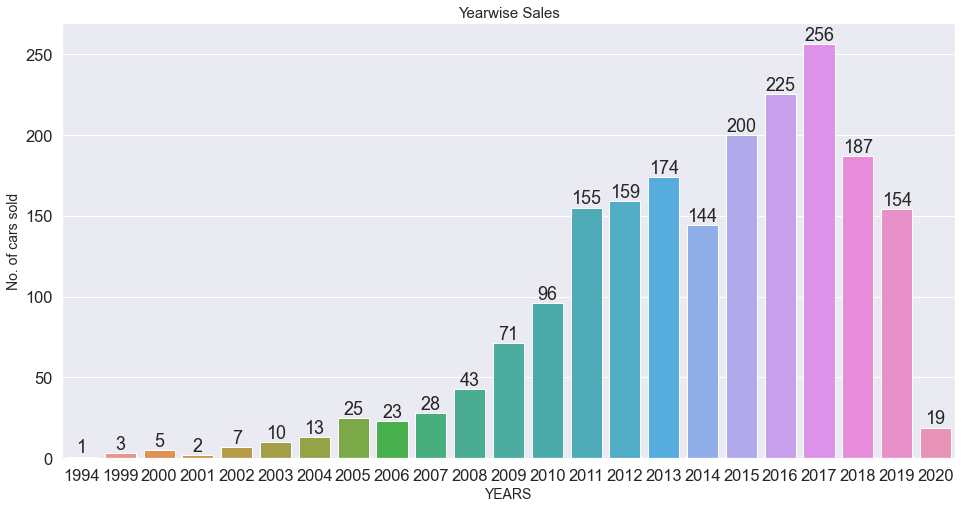

In [17]:
keys = list(dic_soldyear.keys())
vals = list(dic_soldyear.values())

sns.set_style('darkgrid')
sns.set_palette('Set2')


# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x=keys, y=vals, data=sold_df)
#sns.set(font_scale=1)


plt.title('Yearwise Sales', size=15)
plt.xlabel('YEARS', size=14)
plt.ylabel('No. of cars sold', size=14)
for i in ax.containers:
    ax.bar_label(i,)

In [18]:
list_year=unsold_df['YEAR'].values.tolist()
x = np.array(list_year)
unique2_years=np.unique(x)
dic_unsoldyear={}

for year in unique2_years:
    dic_unsoldyear[year] = list_year.count(year)

print ("Unsold car details year wise : \n")
print (dic_unsoldyear)




Unsold car details year wise : 

{1994: 1, 1995: 1, 1996: 2, 1997: 9, 1998: 9, 1999: 11, 2000: 10, 2001: 4, 2002: 12, 2003: 27, 2004: 38, 2005: 51, 2006: 79, 2007: 145, 2008: 158, 2009: 160, 2010: 279, 2011: 415, 2012: 462, 2013: 494, 2014: 476, 2015: 575, 2016: 631, 2017: 754, 2018: 619, 2019: 429, 2020: 55}


### REGION

In [19]:
# State-wise no.of Cars sold

result_sold = sold_df.groupby(['STATE_NAME']).aggregate(['count'])["SOLD"]
print ("Sold car details based on STATE, CITY & POSTAL CODE\n")
result_sold

Sold car details based on STATE, CITY & POSTAL CODE



,count
STATE_NAME,
Andhra Pradesh,68
Bihar,69
Delhi,80
Gujarat,208
Jharkhand,127
Karnataka,223
Kerala,130
Madhya Pradesh,69
Maharashtra,189


In [20]:
#Detail

result_sold = sold_df.groupby(['STATE_NAME','CITY_NAME','POSTAL_CODE']).aggregate(['count'])["SOLD"]
print ("Sold car details based on STATE, CITY & POSTAL CODE\n")
result_sold

Sold car details based on STATE, CITY & POSTAL CODE



count
STATE_NAME     CITY_NAME    POSTAL_CODE       
Andhra Pradesh Nellore      524225          68
Bihar          Patna        800002          67
                            801110           2
Delhi          Delhi        110029          68
                            110039          12
Gujarat        Ahmedabad    380052          53
                            382460          19
               Surat        395007          70
               Vadodara     391510          66
Jharkhand      Jamshedpur   831001          65
               Ranchi       834001          62
Karnataka      Bangalore    560002          38
                            560034          15
                            560037          11
               Mangalore    574142          58
                            575001          18
               Mysore       570004          83
Kerala         Kochi        682001          56
                            682024           6
               Thrissur     680001          50
                            680004          18
Madhya Pradesh Indore       452003          50
                            452010          19
Maharashtra    Aurangabad   431001          60
               Mumbai       400001          53
                            400053          24
               Pune         411002          12
                            411005          19
                            411006          11
                            411043          10
Odisha         Bhubaneshwar 751022          64
Punjab         Ludhiana     141003          63
Rajasthan      Jaipur       302029          55
Sikkim         Gangtok      737101          69
Tamil Nadu     Chennai      600017          20
                            600018          12
                            600020          19
                            600039          21
               Coimbatore   641001          59
                            641043          18
               Vellore      632001          81
Telangana      Hyderabad    500004          20
                            500020          52
Uttar Pradesh  Noida        201301          80
               kanpur       208002          65
Uttarakhand    Dehradun     248001          70
West Bengal    Kolkata      700027          32
                            700053          37

In [21]:
sold_df[['STATE_NAME','BRAND']]

,STATE_NAME,BRAND
0,Maharashtra,Maruti
1,Jharkhand,Skoda
2,Uttar Pradesh,Honda
3,Uttarakhand,Hyundai
4,Tamil Nadu,Maruti
...,...,...
1995,Telangana,Mahindra
1996,Uttar Pradesh,Chevrolet
1997,Andhra Pradesh,Maruti
1998,Bihar,Tata


In [22]:
# State wise sales data.
list_statesold=sold_df['STATE_NAME'].values.tolist()
x = np.array(list_statesold)
unique3_states=np.unique(x)
dic_statesold={}

for state in unique3_states:
    dic_statesold[state] = list_statesold.count(state)

print ("Unsold car details state wise : \n")
print (dic_statesold)

# City wise sales data.

list_citysold=sold_df['CITY_NAME'].values.tolist()
y = np.array(list_citysold)
unique4_city=np.unique(y)
dic_citysold={}

for city in unique4_city:
    dic_citysold[city] = list_citysold.count(city)

print ("\nSold car details city wise : \n")
print (dic_citysold)




Unsold car details state wise : 

{'Andhra Pradesh': 68, 'Bihar': 69, 'Delhi': 80, 'Gujarat': 208, 'Jharkhand': 127, 'Karnataka': 223, 'Kerala': 130, 'Madhya Pradesh': 69, 'Maharashtra': 189, 'Odisha': 64, 'Punjab': 63, 'Rajasthan': 55, 'Sikkim': 69, 'Tamil Nadu': 230, 'Telangana': 72, 'Uttar Pradesh': 145, 'Uttarakhand': 70, 'West Bengal': 69}

Sold car details city wise : 

{'Ahmedabad': 72, 'Aurangabad': 60, 'Bangalore': 64, 'Bhubaneshwar': 64, 'Chennai': 72, 'Coimbatore': 77, 'Dehradun': 70, 'Delhi': 80, 'Gangtok': 69, 'Hyderabad': 72, 'Indore': 69, 'Jaipur': 55, 'Jamshedpur': 65, 'Kochi': 62, 'Kolkata': 69, 'Ludhiana': 63, 'Mangalore': 76, 'Mumbai': 77, 'Mysore': 83, 'Nellore': 68, 'Noida': 80, 'Patna': 69, 'Pune': 52, 'Ranchi': 62, 'Surat': 70, 'Thrissur': 68, 'Vadodara': 66, 'Vellore': 81, 'kanpur': 65}


#### Visualization of State-wise sales of used cars

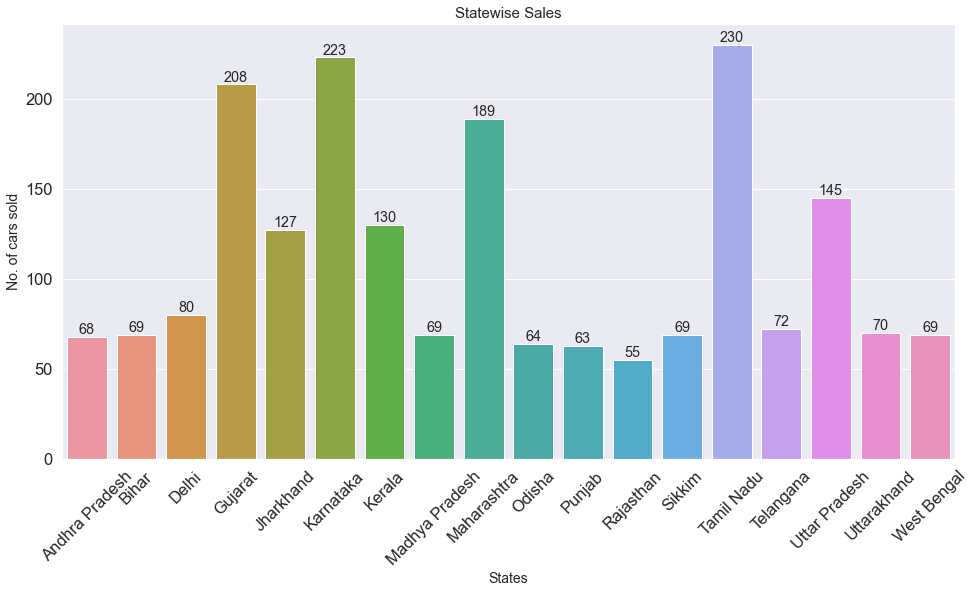

In [23]:
keys = list(dic_statesold.keys())
vals = list(dic_statesold.values())

sns.set_style('darkgrid')
sns.set_palette('Set2')

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x=keys, y=vals, data=sold_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.set(font_scale=1.2)



plt.title('Statewise Sales', size=15)
plt.xlabel('States', size=14)
plt.ylabel('No. of cars sold', size=14)
for i in ax.containers:
    ax.bar_label(i,)

#### Visualization of City wise sales of used cars

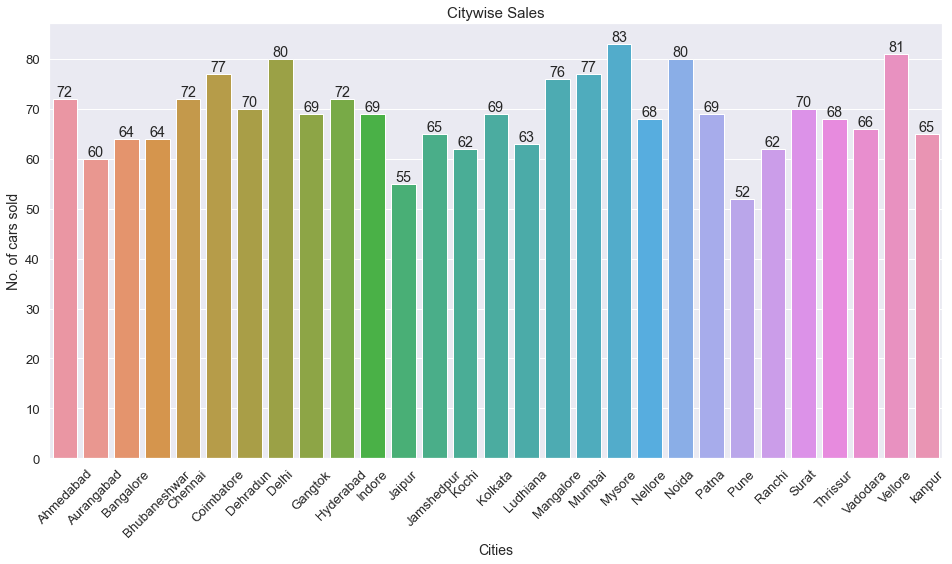

In [24]:
keys = list(dic_citysold.keys())
vals = list(dic_citysold.values())

sns.set_style('darkgrid')
sns.set_palette('Set2')

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x=keys, y=vals, data=sold_df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.set(font_scale=1.2)



plt.title('Citywise Sales', size=15)
plt.xlabel('Cities', size=14)
plt.ylabel('No. of cars sold', size=14)
for i in ax.containers:
    ax.bar_label(i,)

In [25]:
result_unsold = unsold_df.groupby(['STATE_NAME','CITY_NAME','POSTAL_CODE']).aggregate(['count'])["SOLD"]
print ("Unsold car details based on STATE, CITY & POSTAL CODE\n")
result_unsold

Unsold car details based on STATE, CITY & POSTAL CODE



count
STATE_NAME     CITY_NAME    POSTAL_CODE       
Andhra Pradesh Nellore      524225         213
Bihar          Patna        800002         188
Delhi          Delhi        110001          67
                            110029         149
                            110039          24
Gujarat        Ahmedabad    380052          73
                            382220         126
                            382460           7
               Surat        395007          35
                            395101         137
               Vadodara     391510         206
Jharkhand      Jamshedpur   831001         182
               Ranchi       834001         214
Karnataka      Bangalore    560030          16
                            560034           3
                            560037          21
                            560063         172
               Mangalore    574142         203
               Mysore       570004         196
Kerala         Kochi        682001         106
                            682024         111
               Thrissur     680001         202
Madhya Pradesh Indore       452003         186
                            452010           2
Maharashtra    Aurangabad   431001         218
               Mumbai       400035          49
                            400050          60
                            400053         112
               Pune         411002         119
                            411005          19
                            411006          60
Odisha         Bhubaneshwar 751022         191
Punjab         Ludhiana     141003         186
Rajasthan      Jaipur       302013          91
                            302029         128
Sikkim         Gangtok      737101         188
Tamil Nadu     Chennai      600017          22
                            600018          25
                            600020         110
                            600039          56
               Coimbatore   641006          21
                            641043         178
                            641045          18
               Vellore      632001         212
Telangana      Hyderabad    500020         150
                            500032          16
                            500045          24
Uttar Pradesh  Noida        201301         223
               kanpur       208002         182
Uttarakhand    Dehradun     248001         210
West Bengal    Kolkata      700005          39
                            700053         160

### Fuel Type 

In [26]:
print ("Cars sold based on the fuel type:"+"\n")
print (sold_df.groupby("FUEL").agg({"FUEL":'count'}))

print ("\n Uncars sold based on the fuel type:\n")
print (unsold_df.groupby("FUEL").agg({"FUEL":'count'}))



Cars sold based on the fuel type:

        FUEL
FUEL        
CNG        7
Diesel  1052
LPG        6
Petrol   935

 Uncars sold based on the fuel type:

        FUEL
FUEL        
CNG       45
Diesel  3247
LPG       29
Petrol  2585


### Transmission 

In [27]:
print ("Sold Car details based on the mode of Transmission : \n")
print (sold_df.groupby("TRANSMISSION").agg({"TRANSMISSION":'count'}))

print ("\n Unsold Car details based on the mode of Transmission :\n ")
print (unsold_df.groupby("TRANSMISSION").agg({"TRANSMISSION":'count'}))

Sold Car details based on the mode of Transmission : 

              TRANSMISSION
TRANSMISSION              
Automatic              286
Manual                1714

 Unsold Car details based on the mode of Transmission :
 
              TRANSMISSION
TRANSMISSION              
Automatic              755
Manual                5151


### OWNER


In [28]:
print("Sold Car details based on Owner type : \n")
print (sold_df.groupby("OWNER").agg({"OWNER":'count'}))

print(" \n Unsold Car details based on Owner type :")
print (unsold_df.groupby("OWNER").agg({"OWNER":'count'}))

Sold Car details based on Owner type : 

                      OWNER
OWNER                      
First Owner            1326
Fourth & Above Owner     49
Second Owner            490
Third Owner             135
 
 Unsold Car details based on Owner type :
                      OWNER
OWNER                      
First Owner            3889
Fourth & Above Owner    111
Second Owner           1526
Test Drive Car            5
Third Owner             375


### SEATING CAPACITY

In [29]:
print("Sold Car details based on Seating capacity : \n")
print (sold_df.groupby("SEATS").agg({"SEATS":'count'}))

print("\n Unsold Car details based on Seating capacity : \n")
print (unsold_df.groupby("SEATS").agg({"SEATS":'count'}))


Sold Car details based on Seating capacity : 

       SEATS
SEATS       
4         34
5       1568
6         18
7        287
8         66
9         25
10         2

 Unsold Car details based on Seating capacity : 

       SEATS
SEATS       
2          2
4         99
5       4686
6         44
7        833
8        169
9         55
10        17
14         1


### SELLER TYPE


In [30]:
print("Sold Car details based on the type of Seller : \n")
print (sold_df.groupby("SELLER_TYPE").agg({"SELLER_TYPE":'count'}))

print("\n Unold Car details based on the type of Seller : \n")
print (unsold_df.groupby("SELLER_TYPE").agg({"SELLER_TYPE":'count'}))


Sold Car details based on the type of Seller : 

                  SELLER_TYPE
SELLER_TYPE                  
Dealer                    291
Individual               1629
Trustmark Dealer           80

 Unold Car details based on the type of Seller : 

                  SELLER_TYPE
SELLER_TYPE                  
Dealer                    816
Individual               4934
Trustmark Dealer          156


### Kms_DRIVEN

In [31]:
col=sold_df['KM_DRIVEN']
col[(col <10000 )].count()

dic_soldkms = {"Less than 10k": col[(col <10000)].count(), "10k-50k": col[(col >=10000) & (col<=50000)].count(), "50k-100k": col[(col >=50000) &(col<=100000)].count(), "100k-200k": col[(col >=100000) & (col<=200000)].count(), "200k-300k": col[(col >=200000) & (col<=300000)].count(), "Above 300k": col[(col >=300000)].count()}
print("Sold Car details based on how much Kms it already covered : \n")
print (dic_soldkms)

Sold Car details based on how much Kms it already covered : 

{'Less than 10k': 127, '10k-50k': 715, '50k-100k': 871, '100k-200k': 454, '200k-300k': 26, 'Above 300k': 8}


#### Visualization of how KMs covered is effecting the sales of used cars

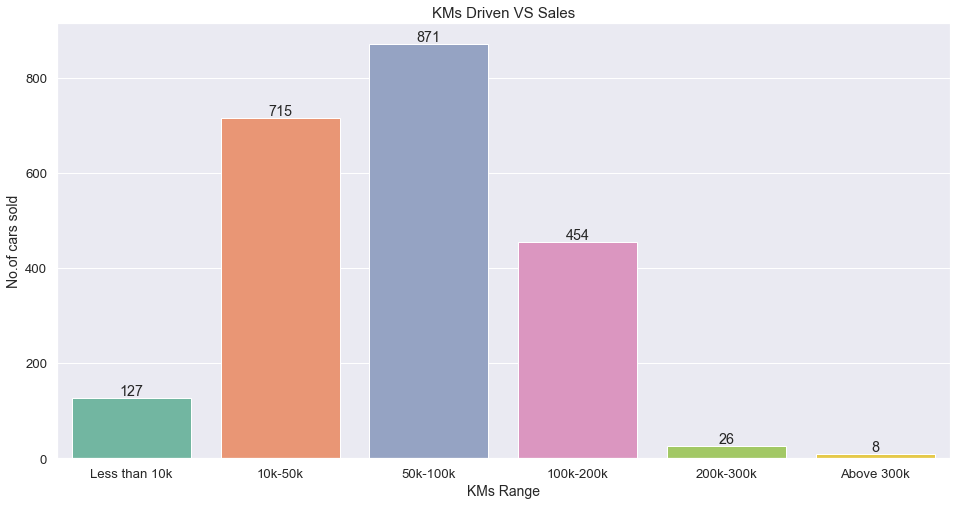

In [32]:
keys = list(dic_soldkms.keys())
vals = list(dic_soldkms.values())

sns.set_style('darkgrid')
sns.set_palette('Set2')

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x=keys, y=vals, data=sold_df)
sns.set(font_scale=1.2)


#plt.title('Yearwise Sales', size=15)
plt.title('KMs Driven VS Sales', size=15)
plt.xlabel('KMs Range', size=14)
plt.ylabel('No.of cars sold', size=14)
for i in ax.containers:
    ax.bar_label(i,)

In [33]:
col2=unsold_df['KM_DRIVEN']
col2[(col2 <10000 )].count()

dic_unsoldkms = {"Less than 10k": col2[(col2 <10000)].count(), "10k-50k": col2[(col2 >=10000) & (col2<=50000)].count(), "50k-100k": col2[(col2 >=50000) &(col2<=100000)].count(), "100k-200k": col2[(col2 >=100000) & (col2<=200000)].count(), "200k-300k": col2[(col2 >=200000) & (col2<=300000)].count(), "Above 300k": col2[(col2 >=300000)].count()}
print("Unsold Car details based on how much Kms it already covered : \n")
print (dic_unsoldkms)

Unsold Car details based on how much Kms it already covered : 

{'Less than 10k': 306, '10k-50k': 2164, '50k-100k': 2500, '100k-200k': 1348, '200k-300k': 109, 'Above 300k': 19}


### SELLING PRICE

In [34]:
selling_price=sold_df['SELLING_PRICE']

dic_selling_price = {"Less than 1 lac": selling_price[(selling_price <100000)].count(), "1lac upto 5lac ": selling_price[(selling_price >=100000) & (selling_price< 500000)].count(), "5 lac upto 10 lac": selling_price[(selling_price >50000) &(selling_price< 100000)].count(), "Above 10lac": selling_price[(selling_price >=1000000)].count()}
print("Sold Car details based on the Selling Price : \n")
print (dic_selling_price)


selling_price2=unsold_df['SELLING_PRICE']

dic_selling_price2 = {"Less than 1 lac": selling_price2[(selling_price2 <100000)].count(), "1lac upto 5lac ": selling_price2[(selling_price2 >=100000) & (selling_price2< 500000)].count(), "5 lac upto 10 lac": selling_price2[(selling_price2 >50000) &(selling_price2< 100000)].count(), "Above 10lac": selling_price2[(selling_price2 >=1000000)].count()}
print("\n Unsold Car details based on the Selling Price : \n")
print (dic_selling_price2)

Sold Car details based on the Selling Price : 

{'Less than 1 lac': 70, '1lac upto 5lac ': 1019, '5 lac upto 10 lac': 59, 'Above 10lac': 235}

 Unsold Car details based on the Selling Price : 

{'Less than 1 lac': 203, '1lac upto 5lac ': 2963, '5 lac upto 10 lac': 152, 'Above 10lac': 633}


#### Visualization of how selling price is effecting the sales of used cars

In [35]:
# Selling Price Analysis of sold cars
sold_df['SELLING_PRICE'].describe().apply(lambda z: format(z, 'f'))

count        2000.000000
mean       676371.538000
std        885688.502988
min         31504.000000
25%        269500.000000
50%        450000.000000
75%        680000.000000
max      10000000.000000
Name: SELLING_PRICE, dtype: object

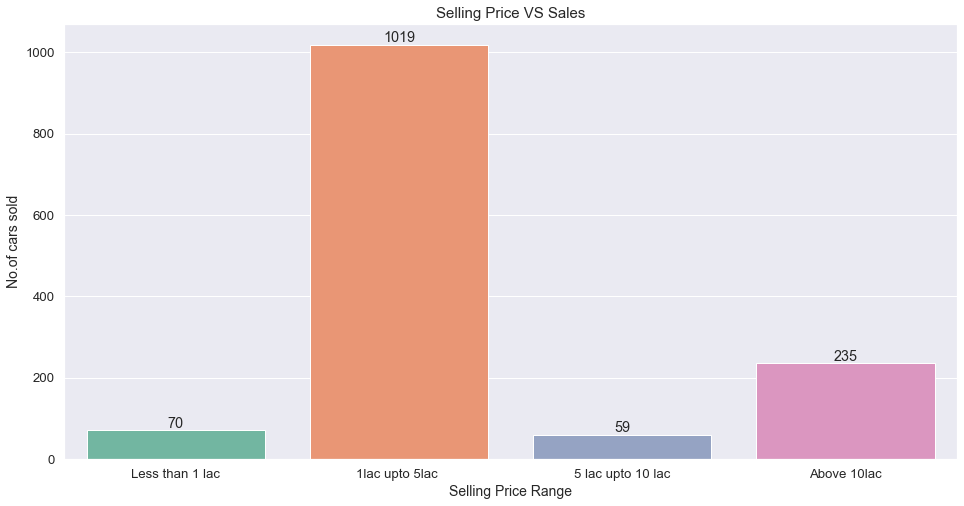

In [36]:
keys = list(dic_selling_price.keys())
vals = list(dic_selling_price.values())

sns.set_style('darkgrid')
sns.set_palette('Set2')

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x=keys, y=vals, data=sold_df)
sns.set(font_scale=1.2)


#plt.title('Yearwise Sales', size=15)
plt.title('Selling Price VS Sales', size=15)
plt.xlabel('Selling Price Range', size=14)
plt.ylabel('No.of cars sold', size=14)
for i in ax.containers:
    ax.bar_label(i,)

### ENGINE TYPE

In [37]:
sold_engine_df=(sold_df["ENGINE"].str.split(" ",1,expand=True))

list_engine_sold=sold_engine_df[0].values.tolist()

list_engine_sold = [int(item) for item in list_engine_sold]


a= len([x for x in list_engine_sold if (x >=500 and x<1000)])
b= len([x for x in list_engine_sold if (x >=1000 and x<1500)])
c= len([x for x in list_engine_sold if (x >=1500 and x<2000)])
d= len([x for x in list_engine_sold if (x >2000)])                
                  
    
dic_engine_sold={"Below 1000cc":a, "1000cc to 1499cc":b, "1500cc to 2000cc":c, "Above 2000cc":d }
print ("Details of Sold cars based on CCs:\n ")
print (dic_engine_sold)

Details of Sold cars based on CCs:
 
{'Below 1000cc': 335, '1000cc to 1499cc': 1136, '1500cc to 2000cc': 202, 'Above 2000cc': 327}


#### Visualization of how Engine capacity is effecting the sales of used cars

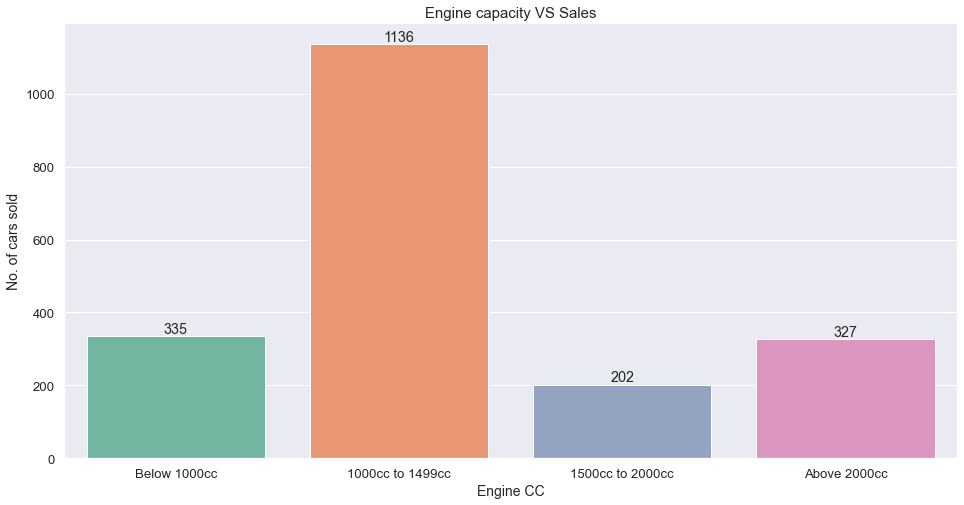

In [38]:
keys = list(dic_engine_sold.keys())
vals = list(dic_engine_sold.values())

sns.set_style('darkgrid')
sns.set_palette('Set2')

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x=keys, y=vals, data=sold_df)
sns.set(font_scale=1.2)


plt.title('Engine capacity VS Sales', size=15)
plt.xlabel('Engine CC', size=14)
plt.ylabel('No. of cars sold', size=14)
for i in ax.containers:
    ax.bar_label(i,)

In [39]:
unsold_engine_df=(unsold_df["ENGINE"].str.split(" ",1,expand=True))

list_engine_unsold=unsold_engine_df[0].values.tolist()

list_engine_unsold = [int(item) for item in list_engine_unsold]


a= len([x for x in list_engine_unsold if (x >=500 and x<1000)])
b= len([x for x in list_engine_unsold if (x >=1000 and x<1500)])
c= len([x for x in list_engine_unsold if (x >=1500 and x<2000)])
d= len([x for x in list_engine_unsold if (x >2000)])                
                  
    
dic_engine_unsold={"Below 1000cc":a, "1000cc to 1499cc":b, "1500cc to 2000cc":c, "Above 2000cc":d }
print ("Details of Unsold cars based on CCs:\n ")
print (dic_engine_unsold)

Details of Unsold cars based on CCs:
 
{'Below 1000cc': 977, '1000cc to 1499cc': 3394, '1500cc to 2000cc': 649, 'Above 2000cc': 886}


### REVENUE Generated

In [40]:
# Revenue generate Brand wise

'''brand_revenue = sold_df.groupby(['BRAND']).agg({'SELLING_PRICE': ['sum']})
pd.set_option('display.max_rows', None)
brand_revenue'''

brand_revenue = sold_df.groupby(['BRAND']).aggregate(['sum'])["SELLING_PRICE"]
pd.set_option('display.max_rows', None)
brand_revenue .sort_values(by=['sum'], ascending=False)

,sum
BRAND,
Maruti,241923482
Hyundai,153801988
Toyota,136779994
BMW,133590000
Mahindra,112218989
Honda,72240146
Volvo,67400000
Tata,65767493
Jaguar,61275000


In [41]:
# Revenue generate State wise

state_revenue = sold_df.groupby(['STATE_NAME']).aggregate(['sum'])["SELLING_PRICE"]
pd.set_option('display.max_rows', None)
state_revenue.sort_values(by=['sum'], ascending=False)

,sum
STATE_NAME,
Tamil Nadu,151438988
Karnataka,143235148
Gujarat,141656988
Maharashtra,110386992
Jharkhand,95757995
Uttar Pradesh,91596500
Kerala,86655995
Andhra Pradesh,74728995
Delhi,59100996


## STATISTICAL ANALYSIS

In [42]:
np.mean(sold_df["SELLING_PRICE"])

676371.538

In [43]:
np.median(sold_df["SELLING_PRICE"])

450000.0

In [44]:
import statistics as st
st.mode(sold_df["SELLING_PRICE"])

300000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SELLING_PRICE'>

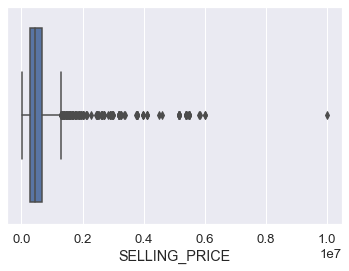

In [45]:
sns.boxplot((sold_df["SELLING_PRICE"]))

<AxesSubplot:xlabel='SELLING_PRICE', ylabel='Count'>

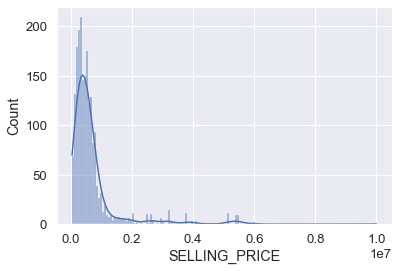

In [46]:
sns.histplot(sold_df["SELLING_PRICE"], kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRANSMISSION', ylabel='count'>

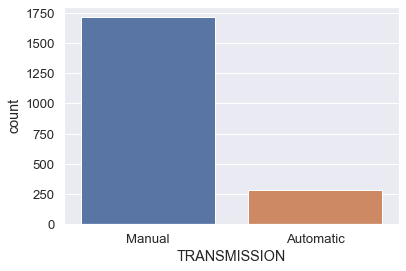

In [47]:
sns.countplot(sold_df["TRANSMISSION"])


In [48]:
sold_df

,SALES_ID,NAME,YEAR,SELLING_PRICE,KM_DRIVEN,CITY_CODE,STATE_CODE,POSTAL_CODE,FUEL,SELLER_TYPE,...,MAX_POWER,SEATS,MILEAGE_UNIT,MILEAGE_NO,STATE_NAME,CITY_NAME,SOLD,REGION,BRAND,MODEL
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,...,74 bhp,5,kmpl,23.40,Maharashtra,Mumbai,Y,West,Maruti,Swift Dzire VDI
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,...,103.52 bhp,5,kmpl,21.14,Jharkhand,Ranchi,Y,East,Skoda,Rapid 1.5 TDI Ambition
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,...,78 bhp,5,kmpl,17.70,Uttar Pradesh,Noida,Y,Central,Honda,City 2017-2020 EXi
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,...,90 bhp,5,kmpl,23.00,Uttarakhand,Dehradun,Y,Central,Hyundai,i20 Sportz Diesel
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,...,88.2 bhp,5,kmpl,16.10,Tamil Nadu,Chennai,Y,South,Maruti,Swift VXI BSIII
5,6,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,CT06,ST22,302029,Petrol,Individual,...,81.86 bhp,5,kmpl,20.14,Rajasthan,Jaipur,Y,North,Hyundai,Xcent 1.2 VTVT E Plus
6,7,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,CT06,ST22,302029,LPG,Individual,...,57.5 bhp,5,km/kg,17.30,Rajasthan,Jaipur,Y,North,Maruti,Wagon R LXI DUO BSIII
7,8,Maruti 800 DX BSII,2001,45000,5000,CT02,ST15,411002,Petrol,Individual,...,37 bhp,4,kmpl,16.10,Maharashtra,Pune,Y,West,Maruti,800 DX BSII
8,9,Toyota Etios VXD,2011,350000,90000,CT26,ST15,431001,Diesel,Individual,...,67.1 bhp,5,kmpl,23.59,Maharashtra,Aurangabad,Y,West,Toyota,Etios VXD
9,10,Ford Figo Diesel Celebration Edition,2013,200000,169000,CT10,ST12,560034,Diesel,Individual,...,68.1 bhp,5,kmpl,20.00,Karnataka,Bangalore,Y,South,Ford,Figo Diesel Celebration Edition


In [3]:
new_df = pd.get_dummies(sold_df["TRANSMISSION"])

In [4]:
sold_df['Automatic'] = new_df['Automatic'].to_list()
sold_df['Manual'] = new_df['Manual'].to_list()

C:\Users\avi.koyani\AppData\Local\Temp\ipykernel_18684\3663743469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_df['Automatic'] = new_df['Automatic'].to_list()
C:\Users\avi.koyani\AppData\Local\Temp\ipykernel_18684\3663743469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_df['Manual'] = new_df['Manual'].to_list()


In [5]:
sold_df = sold_df.drop(['SOLD','REGION','CITY_NAME','SALES_ID'],axis=1)

In [6]:
sold_df = sold_df.drop(['TRANSMISSION'],axis=1)

In [7]:
new_cst = pd.get_dummies(sold_df["FUEL"])

In [8]:
sold_df['CNG'] = new_cst['CNG'].to_list()
sold_df['Diesel'] = new_cst['Diesel'].to_list()
sold_df['LPG'] = new_cst['LPG'].to_list()
sold_df['Petrol'] = new_cst['Petrol'].to_list()

In [9]:
corrmat = sold_df.corr()

In [10]:
corrmat

,YEAR,SELLING_PRICE,KM_DRIVEN,POSTAL_CODE,SEATS,MILEAGE_NO,Automatic,Manual,CNG,Diesel,LPG,Petrol
YEAR,1.000000,0.416338,-0.425820,0.048369,-0.009627,0.318170,0.261382,-0.261382,0.053523,0.027679,-0.060302,-0.027425
SELLING_PRICE,0.416338,1.000000,-0.235364,0.014967,0.009365,-0.100772,0.603017,-0.603017,-0.021031,0.190982,-0.029439,-0.185412
KM_DRIVEN,-0.425820,-0.235364,1.000000,-0.024176,0.263775,-0.190372,-0.214923,0.214923,-0.017490,0.285572,0.027161,-0.286698
POSTAL_CODE,0.048369,0.014967,-0.024176,1.000000,-0.003118,-0.005556,0.015653,-0.015653,0.017969,-0.000169,-0.009704,-0.000894
SEATS,-0.009627,0.009365,0.263775,-0.003118,1.000000,-0.463379,-0.091364,0.091364,-0.035304,0.357869,-0.024570,-0.351270
MILEAGE_NO,0.318170,-0.100772,-0.190372,-0.005556,-0.463379,1.000000,-0.181429,0.181429,0.089899,0.038590,0.025789,-0.052087
Automatic,0.261382,0.603017,-0.214923,0.015653,-0.091364,-0.181429,1.000000,-1.000000,-0.024209,-0.029851,-0.022407,0.035196
Manual,-0.261382,-0.603017,0.214923,-0.015653,0.091364,0.181429,-1.000000,1.000000,0.024209,0.029851,0.022407,-0.035196
CNG,0.053523,-0.021031,-0.017490,0.017969,-0.035304,0.089899,-0.024209,0.024209,1.000000,-0.062431,-0.003251,-0.055530
Diesel,0.027679,0.190982,0.285572,-0.000169,0.357869,0.038590,-0.029851,0.029851,-0.062431,1.000000,-0.057785,-0.987040


In [17]:
import seaborn as sb
import matplotlib.pyplot as mp

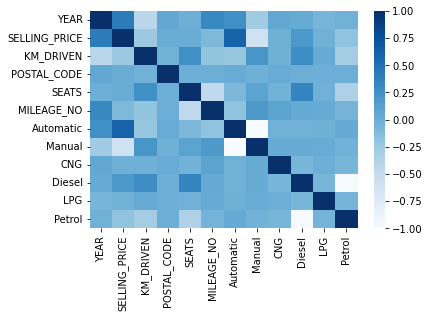

In [29]:
dataplot = sb.heatmap(corrmat,cmap="Blues")
mp.show()